# 1  데이터 전처리

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn.preprocessing import MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

from functools import reduce

import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

movies = pd.read_csv('data_movies.dat', sep='::', names=['movie_id', 'movie_title', 'movie_genres'], engine='python')

In [2]:
movies

,movie_id,movie_title,movie_genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


##### Movie Datas For Clustering

In [3]:
mdfc = movies.drop('movie_title', axis=1)
mdfc = mdfc.drop('movie_id', axis=1)

##### One Hot Encoding

In [4]:
mdfc['movie_genres'] = mdfc['movie_genres'].str.split('|')
mdfc

,movie_genres
0,"[Animation, Children's, Comedy]"
1,"[Adventure, Children's, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama]"
4,[Comedy]
...,...
3878,[Comedy]
3879,[Drama]
3880,[Drama]
3881,[Drama]


In [5]:
mdfc = pd.DataFrame(mlb.fit_transform(mdfc.pop('movie_genres')),
                                 columns=mlb.classes_,
                                  index=mdfc.index)

In [6]:
mdfc

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# 2  클러스터링 

### K-Means

##### Search for Elbow Point

In [7]:
Sum_of_squared_distances = []

K = range(1, 19)

for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(mdfc.values)
  Sum_of_squared_distances.append(km.inertia_)

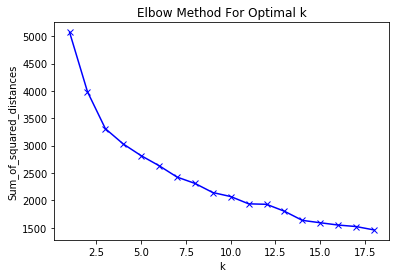

In [8]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
movie_model = KMeans(n_clusters=6)
movie_model.fit(mdfc.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
movie_result = movies.join(pd.DataFrame(movie_model.labels_, columns = ['movie_cluster']))
movie_result = movie_result.join(mdfc)
movie_result

,movie_id,movie_title,movie_genres,movie_cluster,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,2,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Hierarchical

In [11]:
# movie_model = AgglomerativeClustering(n_clusters=6, linkage = 'ward')
# movie_model.fit(mdfc.values)

In [12]:
# movie_model.labels_

In [13]:
# from scipy.cluster.hierarchy import linkage, dendrogram

# z = linkage(mdfc, 'ward')
# dendrogram(z)

In [14]:
# from scipy.cluster.hierarchy import fcluster

# movie_model = pd.DataFrame(fcluster(z, 22, criterion='distance'))
# movie_model.columns = ['movie_cluster']
# movie_model['movie_cluster'] = movie_model['movie_cluster'] - 1
# movie_model

In [15]:
# movie_result = movies.join(movie_model)
# movie_result = movie_result.join(mdfc)
# movie_result
# movie_result = movies.join(pd.DataFrame(movie_model.labels_, columns = ['movie_cluster']))
# movie_result = movie_result.join(mdfc)
# movie_result

### Result

In [16]:
movie_result[movie_result.movie_cluster==0]

,movie_id,movie_title,movie_genres,movie_cluster,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,3928,Abbott and Costello Meet Frankenstein (1948),Comedy|Horror,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3859,3929,"Bank Dick, The (1940)",Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3873,3943,Bamboozled (2000),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3874,3944,Bootmen (2000),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
movie_result[movie_result.movie_cluster==1]

,movie_id,movie_title,movie_genres,movie_cluster,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
150,152,"Addiction, The (1995)",Horror,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
175,177,Lord of Illusions (1995),Horror,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
186,188,"Prophecy, The (1995)",Horror,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
194,196,Species (1995),Horror|Sci-Fi,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
218,220,Castle Freak (1995),Horror,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,3938,"Slumber Party Massacre, The (1982)",Horror,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3869,3939,"Slumber Party Massacre II, The (1987)",Horror,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3870,3940,"Slumber Party Massacre III, The (1990)",Horror,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3871,3941,Sorority House Massacre (1986),Horror,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
movie_result[movie_result.movie_cluster==2]

,movie_id,movie_title,movie_genres,movie_cluster,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,2,Jumanji (1995),Adventure|Children's|Fantasy,2,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children's,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,13,Balto (1995),Animation|Children's,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27,28,Persuasion (1995),Romance,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
28,29,"City of Lost Children, The (1995)",Adventure|Sci-Fi,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3843,3913,Barenaked in America (1999),Documentary,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3856,3926,Voyage to the Bottom of the Sea (1961),Adventure|Sci-Fi,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3857,3927,Fantastic Voyage (1966),Adventure|Sci-Fi,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3864,3934,Kronos (1957),Sci-Fi,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
movie_result[movie_result.movie_cluster==3]

,movie_id,movie_title,movie_genres,movie_cluster,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5,6,Heat (1995),Action|Crime|Thriller,3,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15,16,Casino (1995),Drama|Thriller,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,18,Four Rooms (1995),Thriller,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21,22,Copycat (1995),Crime|Drama|Thriller,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
22,23,Assassins (1995),Thriller,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,3936,"Phantom of the Opera, The (1943)",Drama|Thriller,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3867,3937,Runaway (1984),Sci-Fi|Thriller,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3876,3946,Get Carter (2000),Action|Drama|Thriller,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3877,3947,Get Carter (1971),Thriller,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
movie_result[movie_result.movie_cluster==4]

,movie_id,movie_title,movie_genres,movie_cluster,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
13,14,Nixon (1995),Drama,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),Drama|Romance,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23,24,Powder (1995),Drama|Sci-Fi,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,25,Leaving Las Vegas (1995),Drama|Romance,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
25,26,Othello (1995),Drama,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,3916,Remember the Titans (2000),Drama,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3850,3920,"Faraway, So Close (In Weiter Ferne, So Nah!) (...",Drama|Fantasy,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
movie_result[movie_result.movie_cluster==5]

,movie_id,movie_title,movie_genres,movie_cluster,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8,9,Sudden Death (1995),Action,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,15,Cutthroat Island (1995),Action|Adventure|Romance,5,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19,20,Money Train (1995),Action,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,44,Mortal Kombat (1995),Action|Adventure,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,3827,Space Cowboys (2000),Action|Sci-Fi,5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3794,3864,Godzilla 2000 (Gojira ni-sen mireniamu) (1999),Action|Adventure|Sci-Fi,5,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3807,3877,Supergirl (1984),Action|Adventure|Fantasy,5,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3809,3879,"Art of War, The (2000)",Action,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3  데이터 분석

In [23]:
ratings_data = pd.read_csv('data_ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')
ratings_data = ratings_data.drop('user_id', axis=1)
ratings_data = ratings_data.drop('timestamp', axis=1)
ratings_data

,movie_id,rating
0,1193,5
1,661,3
2,914,3
3,3408,4
4,2355,5
...,...,...
1000204,1091,1
1000205,1094,5
1000206,562,5
1000207,1096,4


In [24]:
ratings_result = ratings_data.groupby(['movie_id'], as_index=False).mean()
ratings_result.rename(columns={'rating':'rating_avg'}, inplace=True)
ratings_counts = ratings_data.groupby(['movie_id'], as_index=False).count()
ratings_result["all_ratings"] = ratings_counts["rating"] 
ratings_result

,movie_id,rating_avg,all_ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


In [25]:
movie_result['movie_cluster'].value_counts()

4    1261
0    1164
2     498
3     377
5     304
1     279
Name: movie_cluster, dtype: int64

###  Movie Cluster 0

In [26]:
movie_cluster_0 = movie_result[movie_result.movie_cluster==0]
movie_cluster_0 = movie_cluster_0.drop('movie_title', axis=1)
movie_cluster_0 = movie_cluster_0.drop('movie_genres',axis=1)
movie_cluster_0 = movie_cluster_0.drop('movie_cluster',axis=1)
movie_cluster_0

,movie_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,3928,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3859,3929,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3873,3943,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3874,3944,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


##### most genres

In [27]:
sum_0 = movie_cluster_0.sum()
sum_0 = sum_0.sort_values(ascending=False)
sum_0 = pd.DataFrame(sum_0, columns=['count'])
sum_0 = sum_0[1:4]
sum_0

,count
Comedy,1164
Drama,224
Romance,199


##### most movies

In [28]:
most_movie_0 = pd.merge(ratings_result, movie_cluster_0, on='movie_id')
most_movie_0 = most_movie_0.sort_values(by=['all_ratings','rating_avg'], ascending=False)
most_movie_0 = most_movie_0[:50]
most_movie_0 = most_movie_0[['movie_id','rating_avg','all_ratings']]
most_movie_0.reset_index().drop('index', axis=1)
most_movie_0 = pd.merge(movies, most_movie_0, on='movie_id')
most_movie_0.sort_values(by=['all_ratings','rating_avg'], ascending=False)

,movie_id,movie_title,movie_genres,rating_avg,all_ratings
42,2858,American Beauty (1999),Comedy|Drama,4.317386,3428
16,1270,Back to the Future (1985),Comedy|Sci-Fi,3.990321,2583
33,2396,Shakespeare in Love (1998),Comedy|Romance,4.127480,2369
15,1265,Groundhog Day (1993),Comedy|Romance,3.953029,2278
44,2997,Being John Malkovich (1999),Comedy,4.125390,2241
5,356,Forrest Gump (1994),Comedy|Romance|War,4.087967,2194
38,2716,Ghostbusters (1984),Comedy|Horror,3.905548,2181
0,1,Toy Story (1995),Animation|Children's|Comedy,4.146846,2077
14,1259,Stand by Me (1986),Adventure|Comedy|Drama,4.096919,1785
2,34,Babe (1995),Children's|Comedy|Drama,3.891491,1751


###  Movie Cluster 1

##### most genres

In [29]:
movie_cluster_1 = movie_result[movie_result.movie_cluster==1]
movie_cluster_1 = movie_cluster_1.drop('movie_title', axis=1)
movie_cluster_1 = movie_cluster_1.drop('movie_genres',axis=1)
movie_cluster_1 = movie_cluster_1.drop('movie_cluster',axis=1)
sum_1 = movie_cluster_1.sum()
sum_1 = sum_1.sort_values(ascending=False)
sum_1 = pd.DataFrame(sum_1, columns=['count'])
sum_1 = sum_1[1:4]
sum_1

,count
Horror,279
Thriller,53
Sci-Fi,46


##### most movies

In [30]:
most_movie_1 = pd.merge(ratings_result, movie_cluster_1, on='movie_id')
most_movie_1 = most_movie_1.sort_values(by=['all_ratings','rating_avg'], ascending=False)
most_movie_1 = most_movie_1[:50]
most_movie_1 = most_movie_1[['movie_id','rating_avg','all_ratings']]
most_movie_1.reset_index().drop('index', axis=1)
most_movie_1 = pd.merge(movies, most_movie_1, on='movie_id')
most_movie_1.sort_values(by=['all_ratings','rating_avg'], ascending=False)

,movie_id,movie_title,movie_genres,rating_avg,all_ratings
12,1387,Jaws (1975),Action|Horror,4.089570,1697
2,1219,Psycho (1960),Horror|Thriller,4.218527,1263
36,2710,"Blair Witch Project, The (1999)",Horror,3.031528,1237
33,2657,"Rocky Horror Picture Show, The (1975)",Comedy|Horror|Musical|Sci-Fi,3.291160,1233
3,1258,"Shining, The (1980)",Horror,4.104876,1087
28,2455,"Fly, The (1986)",Horror|Sci-Fi,3.440710,1071
43,3081,Sleepy Hollow (1999),Horror|Romance,3.516886,1066
14,1407,Scream (1996),Horror|Thriller,3.575621,886
22,1997,"Exorcist, The (1973)",Horror,3.955932,885
46,3499,Misery (1990),Horror,3.825792,884


###  Movie Cluster 2

##### most genres

In [31]:
movie_cluster_2 = movie_result[movie_result.movie_cluster==2]
movie_cluster_2 = movie_cluster_2.drop('movie_title', axis=1)
movie_cluster_2 = movie_cluster_2.drop('movie_genres',axis=1)
movie_cluster_2 = movie_cluster_2.drop('movie_cluster',axis=1)
sum_2 = movie_cluster_2.sum()
sum_2 = sum_2.sort_values(ascending=False)
sum_2 = pd.DataFrame(sum_2, columns=['count'])
sum_2 = sum_2[1:4]
sum_2

,count
Children's,122
Documentary,119
Adventure,100


##### most movies

In [32]:
most_movie_2 = pd.merge(ratings_result, movie_cluster_2, on='movie_id')
most_movie_2 = most_movie_2.sort_values(by=['all_ratings','rating_avg'], ascending=False)
most_movie_2 = most_movie_2[:50]
most_movie_2 = most_movie_2[['movie_id','rating_avg','all_ratings']]
most_movie_2.reset_index().drop('index', axis=1)
most_movie_2 = pd.merge(movies, most_movie_2, on='movie_id')
most_movie_2.sort_values(by=['all_ratings','rating_avg'], ascending=False)

,movie_id,movie_title,movie_genres,rating_avg,all_ratings
4,541,Blade Runner (1982),Film-Noir|Sci-Fi,4.273333,1800
44,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Film-Noir,3.679822,1799
10,750,Dr. Strangelove or: How I Learned to Stop Worr...,Sci-Fi|War,4.449890,1367
22,1206,"Clockwork Orange, A (1971)",Sci-Fi,4.078112,1229
3,364,"Lion King, The (1994)",Animation|Children's|Musical,3.860839,1121
7,595,Beauty and the Beast (1991),Animation|Children's|Musical,3.885849,1060
12,913,"Maltese Falcon, The (1941)",Film-Noir|Mystery,4.395973,1043
43,2968,Time Bandits (1981),Adventure|Fantasy|Sci-Fi,3.694059,1010
24,1266,Unforgiven (1992),Western,4.090271,997
25,1282,Fantasia (1940),Animation|Children's|Musical,3.904560,943


###  Movie Cluster 3

##### most genres

In [33]:
movie_cluster_3 = movie_result[movie_result.movie_cluster==3]
movie_cluster_3 = movie_cluster_3.drop('movie_title', axis=1)
movie_cluster_3 = movie_cluster_3.drop('movie_genres',axis=1)
movie_cluster_3 = movie_cluster_3.drop('movie_cluster',axis=1)
sum_3 = movie_cluster_3.sum()
sum_3 = sum_3.sort_values(ascending=False)
sum_3 = pd.DataFrame(sum_3, columns=['count'])
sum_3 = sum_3[1:4]
sum_3

,count
Thriller,377
Drama,110
Action,87


##### most movies

In [34]:
most_movie_3 = pd.merge(ratings_result, movie_cluster_3, on='movie_id')
most_movie_3 = most_movie_3.sort_values(by=['all_ratings','rating_avg'], ascending=False)
most_movie_3 = most_movie_3[:50]
most_movie_3 = most_movie_3[['movie_id','rating_avg','all_ratings']]
most_movie_3.reset_index().drop('index', axis=1)
most_movie_3 = pd.merge(movies, most_movie_3, on='movie_id')
most_movie_3.sort_values(by=['all_ratings','rating_avg'], ascending=False)

,movie_id,movie_title,movie_genres,rating_avg,all_ratings
11,593,"Silence of the Lambs, The (1991)",Drama|Thriller,4.351823,2578
12,608,Fargo (1996),Crime|Drama|Thriller,4.254676,2513
39,2762,"Sixth Sense, The (1999)",Thriller,4.406263,2459
25,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,4.219406,2288
9,457,"Fugitive, The (1993)",Action|Thriller,4.103258,1995
2,50,"Usual Suspects, The (1995)",Crime|Thriller,4.517106,1783
16,924,2001: A Space Odyssey (1968),Drama|Mystery|Sci-Fi|Thriller,4.068765,1716
17,1036,Die Hard (1988),Action|Thriller,4.121849,1666
24,1610,"Hunt for Red October, The (1990)",Action|Thriller,4.052058,1652
7,377,Speed (1994),Action|Romance|Thriller,3.565455,1650


###  Movie Cluster 4

##### most genres

In [35]:
movie_cluster_4 = movie_result[movie_result.movie_cluster==4]
movie_cluster_4 = movie_cluster_4.drop('movie_title', axis=1)
movie_cluster_4 = movie_cluster_4.drop('movie_genres',axis=1)
movie_cluster_4 = movie_cluster_4.drop('movie_cluster',axis=1)
sum_4 = movie_cluster_4.sum()
sum_4 = sum_4.sort_values(ascending=False)
sum_4 = pd.DataFrame(sum_4, columns=['count'])
sum_4 = sum_4[1:4]
sum_4

,count
Drama,1261
Romance,161
War,68


##### most movies

In [36]:
most_movie_4 = pd.merge(ratings_result, movie_cluster_4, on='movie_id')
most_movie_4 = most_movie_4.sort_values(by=['all_ratings','rating_avg'], ascending=False)
most_movie_4 = most_movie_4[:50]
most_movie_4 = most_movie_4[['movie_id','rating_avg','all_ratings']]
most_movie_4.reset_index().drop('index', axis=1)
most_movie_4 = pd.merge(movies, most_movie_4, on='movie_id')
most_movie_4.sort_values(by=['all_ratings','rating_avg'], ascending=False)

,movie_id,movie_title,movie_genres,rating_avg,all_ratings
37,2028,Saving Private Ryan (1998),Action|Drama|War,4.337354,2653
2,110,Braveheart (1995),Action|Drama|War,4.234957,2443
6,527,Schindler's List (1993),Drama|War,4.510417,2304
15,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,3.965183,2269
5,318,"Shawshank Redemption, The (1994)",Drama,4.554558,2227
8,858,"Godfather, The (1972)",Action|Crime|Drama,4.524966,2223
4,296,Pulp Fiction (1994),Crime|Drama,4.278213,2171
48,3578,Gladiator (2000),Action|Drama,4.106029,1924
17,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4.390725,1725
10,919,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,4.247963,1718


###  Movie Cluster 5

##### most genres

In [37]:
movie_cluster_5 = movie_result[movie_result.movie_cluster==5]
movie_cluster_5 = movie_cluster_5.drop('movie_title', axis=1)
movie_cluster_5 = movie_cluster_5.drop('movie_genres',axis=1)
movie_cluster_5 = movie_cluster_5.drop('movie_cluster',axis=1)
sum_5 = movie_cluster_5.sum()
sum_5 = sum_5.sort_values(ascending=False)
sum_5 = pd.DataFrame(sum_5, columns=['count'])
sum_5 = sum_5[1:4]
sum_5

,count
Action,304
Adventure,127
Sci-Fi,106


##### most movies

In [38]:
most_movie_5 = pd.merge(ratings_result, movie_cluster_5, on='movie_id')
most_movie_5 = most_movie_5.sort_values(by=['all_ratings','rating_avg'], ascending=False)
most_movie_5 = most_movie_5[:50]
most_movie_5 = most_movie_5[['movie_id','rating_avg','all_ratings']]
most_movie_5.reset_index().drop('index', axis=1)
most_movie_5 = pd.merge(movies, most_movie_5, on='movie_id')
most_movie_5.sort_values(by=['all_ratings','rating_avg'], ascending=False)

,movie_id,movie_title,movie_genres,rating_avg,all_ratings
0,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4.453694,2991
14,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,4.292977,2990
18,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,4.022893,2883
4,480,Jurassic Park (1993),Action|Adventure|Sci-Fi,3.763847,2672
5,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,4.058513,2649
37,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.315830,2590
31,1580,Men in Black (1997),Action|Adventure|Comedy|Sci-Fi,3.739953,2538
16,1198,Raiders of the Lost Ark (1981),Action|Adventure,4.477725,2514
15,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,4.303710,2318
39,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi,3.409778,2250


# 4 추천 

In [39]:
joblib.dump(movie_model, 'movie_recommend_model.pkl')
movie_recommend_model = joblib.load('movie_recommend_model.pkl')
movie_recommend_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
title = input("Enter Movie Title > ")

Enter Movie Title > avengers


In [41]:
print("Genre List : 1) Action 2) Adventure 3) Animantion 4) Childerns's 5) Comedy 6) Crime 7) Documentary 8) Drama 9) Fantasy 10) Film-Noir 11) Horro 12) Musical 13) Mystery 14) Romance 15) Sci-Fi 16) Thriller 17) War 18) Western")
genres = input("Enter all genre numbers ( seprated with , ) > ")

Genre List : 1) Action 2) Adventure 3) Animantion 4) Childerns's 5) Comedy 6) Crime 7) Documentary 8) Drama 9) Fantasy 10) Film-Noir 11) Horro 12) Musical 13) Mystery 14) Romance 15) Sci-Fi 16) Thriller 17) War 18) Western
Enter all genre numbers ( seprated with , ) > 1, 2, 9, 15


In [42]:
genre_encoding = [ 0 for _ in range(18)]
for num in list(map(int,genres.split(','))):
    genre_encoding[num-1] = 1

##### K-Means

In [43]:
movie_group = movie_recommend_model.predict([genre_encoding])[0]
movie_group

5

##### Hierarcacical

In [44]:
# movie_group = movie_recommend_model

##### EM

In [45]:
# movie_rgroup = 

### Predict

In [46]:
user_movie_genre = []
user_movie_recos = []
if movie_group == 0:
    user_movie_genre = sum_0.index
    user_movie_recos = most_movie_0.loc[[random.randint(0,49) for _ in range(5)]]['movie_title']
elif movie_group == 1:
    user_movie_genre = sum_1.index
    user_movie_recos = most_movie_1.loc[[random.randint(0,49) for _ in range(5)]]['movie_title']
elif movie_group == 2:
    user_movie_genre = sum_2.index
    user_movie_recos = most_movie_2.loc[[random.randint(0,49) for _ in range(5)]]['movie_title']
elif movie_group == 3:
    user_movie_genre = sum_3.index
    user_movie_recos = most_movie_3.loc[[random.randint(0,49) for _ in range(5)]]['movie_title']
elif movie_group == 4:
    user_movie_genre = sum_4.index
    user_movie_recos = most_movie_4.loc[[random.randint(0,49) for _ in range(5)]]['movie_title']
elif movie_group == 5:
    user_movie_genre = sum_5.index
    user_movie_recos = most_movie_5.loc[[random.randint(0,49) for _ in range(5)]]['movie_title']
    
print("{} 영화와 비슷하면서 평점 및 뷰가 높은 추천 영화는 {}, {}, {}, {}, {} 입니다.".format(title,*user_movie_recos))

avengers 영화와 비슷하면서 평점 및 뷰가 높은 추천 영화는 Abyss, The (1989), Terminator, The (1984), Fifth Element, The (1997), Arachnophobia (1990), Robocop (1987) 입니다.


In [47]:
print("{} 영화와 비슷한 영화들의 장르는 1위 {}, 2위 {}, 3위 {} 입니다.".format(title,*user_movie_genre))

avengers 영화와 비슷한 영화들의 장르는 1위 Action, 2위 Adventure, 3위 Sci-Fi 입니다.
